In [1]:
# =============================================================================
# EJEMPLO DE USO DE MÓDULOS EDA EN JUPYTER NOTEBOOK
# =============================================================================
# Este archivo contiene ejemplos de código que puedes copiar y pegar
# directamente en un Jupyter notebook para usar las clases EDA

# =============================================================================
# CONFIGURACIÓN INICIAL
# =============================================================================

# Importar librerías necesarias
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configurar matplotlib para notebooks
%matplotlib inline
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Añadir módulos EDA al path
sys.path.append("../")

# Importar clases EDA
from eda_full import EDAFull
from eda_atomic import EDAAtomic

# Configurar directorio de datos (ajustar según tu estructura)
data_dir = Path('../data')  # Cambiar según tu ubicación

print("✅ Configuración completada")
print(f"📁 Directorio de datos: {data_dir}")

✅ Configuración completada
📁 Directorio de datos: ..\data


In [2]:
# =============================================================================
# EJEMPLO 1: ANÁLISIS COMPLETO CON EDAFull
# =============================================================================

print("\n" + "="*60)
print("    EJEMPLO 1: ANÁLISIS COMPLETO DEL DATASET")
print("="*60)

# Inicializar analizador completo
eda_full = EDAFull(data_dir)

# 1. Cargar datasets
print("📊 Cargando datasets...")
eda_full.load_datasets()


    EJEMPLO 1: ANÁLISIS COMPLETO DEL DATASET
📊 Cargando datasets...


True

In [3]:
# 2. Analizar calidad de imágenes (muestra limitada para demo)
print("🔍 Analizando calidad de imágenes...")
quality_df = eda_full.analyze_image_quality(sample_size=20)
print(f"✅ Imágenes analizadas: {len(quality_df)}")

🔍 Analizando calidad de imágenes...


Analizando calidad: 100%|██████████| 20/20 [00:12<00:00,  1.63it/s]

✅ Imágenes analizadas: 20


In [4]:
# Mostrar primeras filas
print("\n📋 Primeras filas del análisis de calidad:")
quality_df.head()


📋 Primeras filas del análisis de calidad:


,image_path,image_name,width,height,aspect_ratio,total_pixels,brightness,contrast,entropy,sharpness,noise_level,saturation,value,background_ratio,object_ratio,dominant_color_r,dominant_color_g,dominant_color_b,dominant_color_h,dominant_color_s,dominant_color_v,edge_density,contour_count,texture_contrast,texture_dissimilarity,texture_homogeneity,texture_energy,texture_correlation,item_id,correct_background,site_id,domain_id
0,..\data\images\MLB2676183970_810034-CBT5028588...,MLB2676183970_810034-CBT50285884507_062022.jpg,646,1200,0.538333,775200,96.763731,104.340131,4.542708,54.589603,0.706175,3.669977,96.930283,1.0,0.0,27.774164,27.645523,27.586729,0,0,27,0.0,0,1615.280399,9.955051,0.483429,0.250638,0.923144,MLB2676183970,1,MLB,MLB-SHIRTS
1,..\data\images\MLB2710427099_606817-MLB5063533...,MLB2710427099_606817-MLB50635333315_072022.jpg,1078,1200,0.898333,1293600,150.595641,86.958621,6.662967,201.124169,1.689676,54.055466,163.933597,1.0,0.0,247.845062,245.920807,243.843933,15,4,247,0.0,0,1787.295674,20.732319,0.303534,0.228987,0.880323,MLB2710427099,1,MLB,MLB-T_SHIRTS
2,..\data\images\MLB2668753339_874428-MLB5021172...,MLB2668753339_874428-MLB50211725548_062022.jpg,1200,1200,1.000000,1440000,229.000876,44.778961,3.300969,176.989884,0.872030,51.284978,246.169013,1.0,0.0,253.701187,254.466522,254.681824,90,1,254,0.0,0,936.824068,10.266539,0.736679,0.588400,0.761042,MLB2668753339,0,MLB,MLB-SPORT_SHORTS
3,..\data\images\MLA1140796722_978470-MLA5019033...,MLA1140796722_978470-MLA50190331476_062022.jpg,1024,1108,0.924188,1134592,132.213851,97.105279,6.876760,1747.519582,4.175306,17.473438,138.160705,1.0,0.0,38.694557,36.815338,37.108196,165,13,38,0.0,0,3054.430453,24.912176,0.298992,0.100693,0.834613,MLA1140796722,?,MLA,MLA-T_SHIRTS
4,..\data\images\MLB2657332793_709539-MLB5009931...,MLB2657332793_709539-MLB50099314619_052022.jpg,1064,810,1.313580,861840,125.988058,108.968402,4.866660,363.860157,1.945293,30.327220,129.169021,1.0,0.0,255.075470,254.975143,254.869720,0,1,255,0.0,0,1965.359966,16.329438,0.433701,0.356795,0.916178,MLB2657332793,1,MLB,MLB-SHORTS


In [10]:
import cv2
import numpy as np
from skimage import morphology

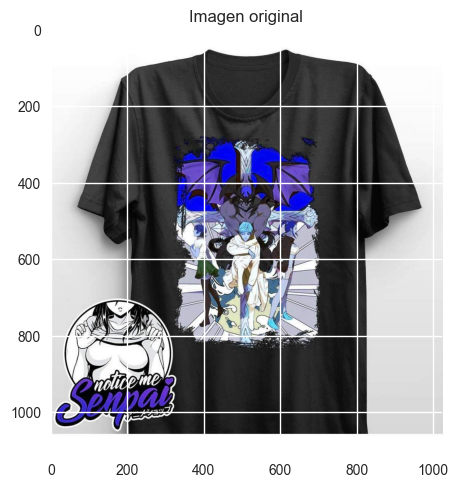

In [61]:
# Load image in BGR format (OpenCV default)
img = cv2.imread(quality_df['image_path'][3])

plt.imshow(img)
plt.title('Imagen original')
plt.show()

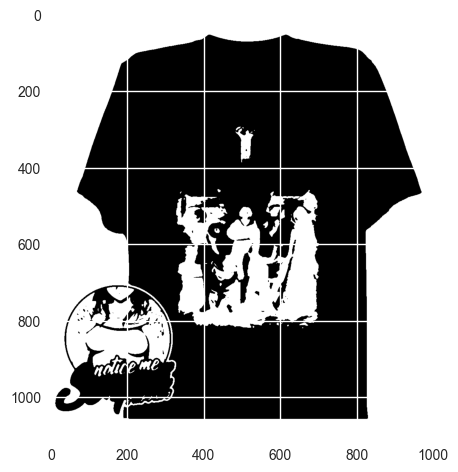

In [62]:
img_gaus = cv2.GaussianBlur(img, (5,5), 100)

# Nota: Recordar que el método de Otsu requiere como input una imagen en el rango [0-255] en formato "uint8".
gray_img = cv2.cvtColor(img_gaus, cv2.COLOR_RGB2GRAY)

t, mask = cv2.threshold(gray_img.astype('uint8'), 0, 1, cv2.THRESH_OTSU)

# Visualizar la máscara resultante
plt.imshow(mask, cmap='gray')
plt.show()

In [63]:
gray_clean = morphology.remove_small_objects(mask.astype(np.bool), 300).astype('uint8')

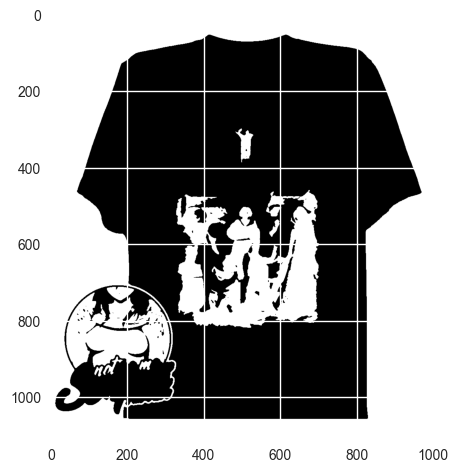

In [64]:
plt.imshow(gray_clean, cmap='gray')
plt.show()

In [37]:
# Detectar bordes para identificar objetos
edges = cv2.Canny(gray_img, 50, 150)

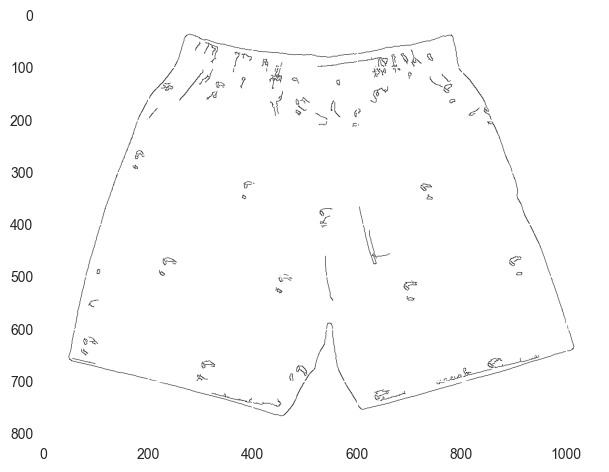

In [38]:
plt.imshow(edges)
plt.show()

In [55]:
# Encontrar contornos
contours, _ = cv2.findContours(gray_clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Calcular área total de contornos (objetos)
# contour_area = sum(cv2.contourArea(c) for c in contours)
# total_area = img.shape[0] * img.shape[1]

In [56]:
# Encontrar el contorno más grande (asumiendo que es el objeto principal)
main_contour = max(contours, key=cv2.contourArea)
# Obtener el rectángulo delimitador del contorno principal
x, y, w, h = cv2.boundingRect(main_contour)
# Definir las semillas como los puntos en las esquinas del rectángulo
rec =  [(x, y+h-1), (x+w, y+h-1)]

In [57]:
rec

[(0, 809), (1064, 809)]

In [59]:
# Dibujar los contornos de los lúmenes en color verde sobre la imagen original RGB. Nota: Utilizar los flags necesarios
# para que los contornos en verde sean perfectamente visibles.
from skimage.measure import label, regionprops

lab, num = label(gray_clean, return_num=True)

cont_img = img.copy()

bboxes = []
for i in range(1, num+1): 
    lumen = lab == i
    lumen = lumen.astype('uint8')
    
    # bbox
    prop = regionprops(lumen)
    bbox = prop[0].bbox
    bboxes.append(bbox)
    cont_img = cv2.rectangle(cont_img, (bbox[1], bbox[0]), (bbox[3], bbox[2]), (25, 175, 40), 5)

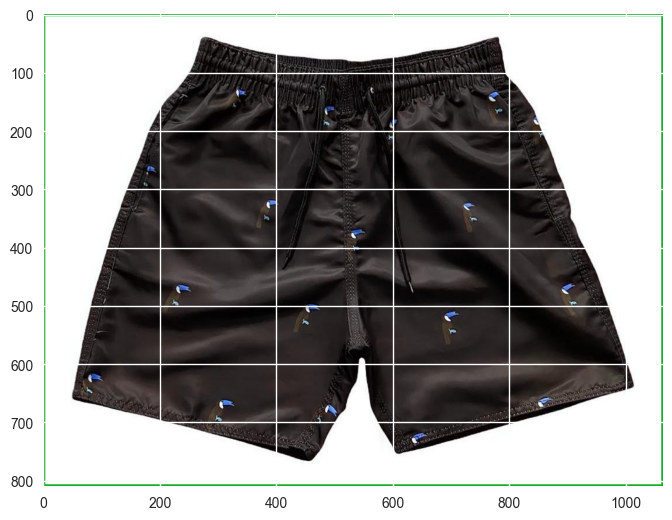

In [60]:
# Visualizar la imagen superpuesta
plt.figure(figsize=(8, 8))
plt.imshow(cont_img, cmap='gray')
plt.show()

In [52]:
# Create visualization
contour_img = img.copy()
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 2)

array([[[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

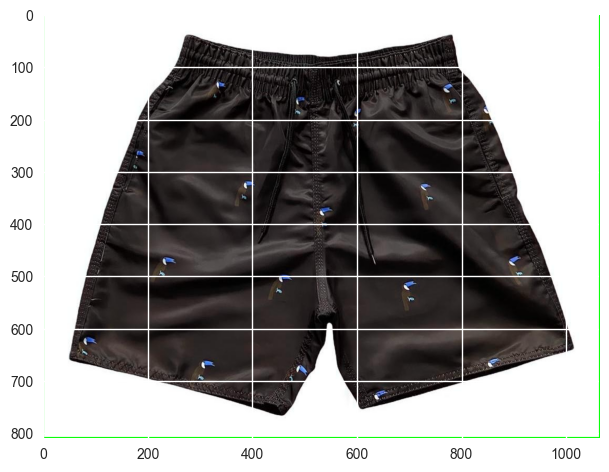

In [53]:
plt.imshow(contour_img)
plt.show()

In [32]:
# Proporción de fondo vs objetos
background_ratio = 1 - (contour_area / total_area)

# Análisis de color del fondo (asumiendo que el fondo es el color más común)
# Usar k-means para encontrar colores dominantes
pixels = img.reshape(-1, 3)
pixels = np.float32(pixels)

# Aplicar k-means
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Encontrar el color más común (probablemente el fondo)
unique, counts = np.unique(labels, return_counts=True)
dominant_color_idx = unique[np.argmax(counts)]
dominant_color = centers[dominant_color_idx]

# Convertir a HSV para análisis
dominant_color_hsv = cv2.cvtColor(np.uint8([[dominant_color]]), cv2.COLOR_RGB2HSV)[0][0]

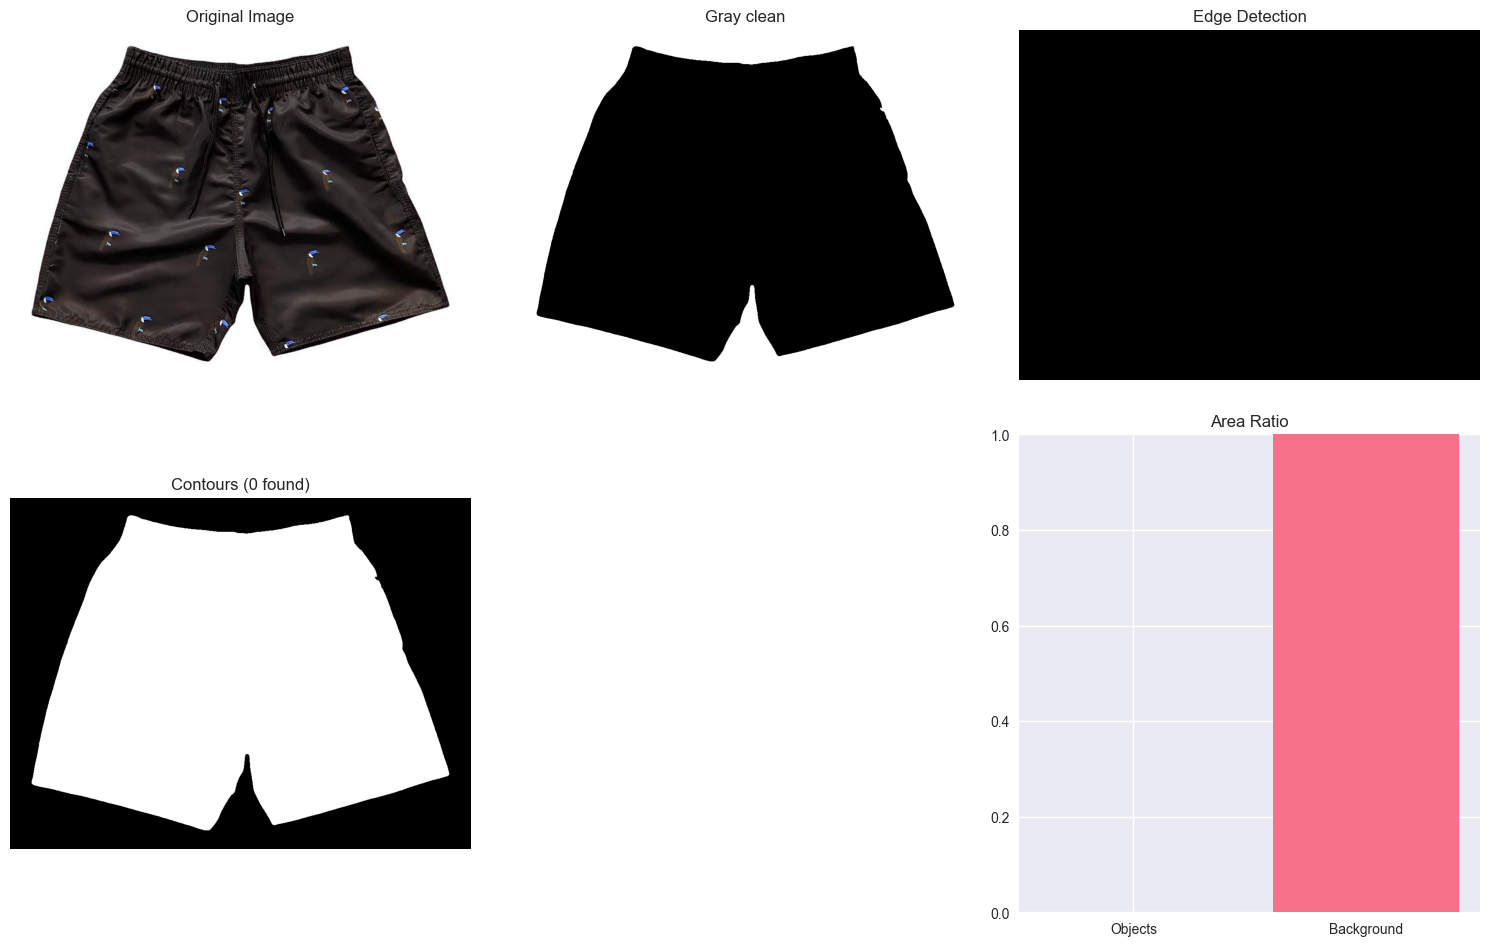

In [34]:
# Plot results
plt.figure(figsize=(15, 10))

# Original image
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

# Grayscale
plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

# Edges
plt.subplot(2, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

# Contours
plt.subplot(2, 3, 4)
plt.imshow(contour_img)
plt.title(f'Contours ({len(contours)} found)')
plt.axis('off')

# Color analysis
plt.subplot(2, 3, 2)
plt.imshow(gray_clean, cmap='gray')
plt.title('Gray clean')
plt.axis('off')

# Area ratio
plt.subplot(2, 3, 6)
plt.bar(['Objects', 'Background'], [contour_area/total_area, background_ratio])
plt.title('Area Ratio')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()

In [8]:
quality_df['correct_background'].value_counts()

correct_background
1    10
?     6
0     4
Name: count, dtype: int64

In [ ]:






# 3. Analizar balance del target
print("\n⚖️ Analizando balance del target...")
balance_stats = eda_full.analyze_target_balance()
print(f"✅ Ratio de desbalance: {balance_stats['imbalance_ratio']:.2f}")
print(f"📊 Distribución del target: {balance_stats['target_distribution']}")

# 4. Analizar tamaños de imagen
print("\n📏 Analizando tamaños de imagen...")
size_stats = eda_full.analyze_image_sizes()
print(f"✅ Categorías de tamaño: {size_stats['size_categories']}")

# 5. Generar estadísticas descriptivas
print("\n📈 Generando estadísticas descriptivas...")
descriptive_stats = eda_full.generate_descriptive_statistics()
print("✅ Estadísticas descriptivas generadas")

# Mostrar estadísticas básicas
print("\n📊 Estadísticas básicas de métricas de calidad:")
print(descriptive_stats.loc[['mean', 'std', 'min', 'max'], ['width', 'height', 'brightness', 'contrast']])

# 6. Crear visualizaciones
print("\n🎨 Creando visualizaciones...")
eda_full.create_visualizations()
print("✅ Visualizaciones creadas")

# 7. Exportar resultados
print("\n💾 Exportando resultados...")
eda_full.export_results()
print("✅ Resultados exportados")

In [ ]:
# =============================================================================
# EJEMPLO 2: ANÁLISIS ATÓMICO CON EDAAtomic
# =============================================================================

print("\n" + "="*60)
print("    EJEMPLO 2: ANÁLISIS ATÓMICO DE IMÁGENES")
print("="*60)

# Inicializar analizador atómico
eda_atomic = EDAAtomic(data_dir)

# 1. Cargar datasets
print("📊 Cargando datasets...")
eda_atomic.load_datasets()

# 2. Visualizar muestra aleatoria
print("🖼️ Visualizando muestra aleatoria...")
eda_atomic.visualize_random_sample(n_samples=3, balance_by_target=True)
print("✅ Visualización completada")

# 3. Obtener muestra para análisis
print("\n📋 Obteniendo muestra para análisis...")
sample_df = eda_atomic.get_random_sample(n_samples=5, balance_by_target=True)
print(f"✅ Muestra seleccionada: {len(sample_df)} imágenes")

# Mostrar información de la muestra
print("\n📊 Información de la muestra:")
print(sample_df[['item_id', 'correct_background?', 'site_id']].head())

# 4. Analizar segmentación de una imagen específica
if not sample_df.empty:
    print("\n🔍 Analizando segmentación de imagen específica...")
    row = sample_df.iloc[0]
    image_path = Path(row['local_path']) if 'local_path' in row else Path(row['image_path'])
    
    print(f"📁 Imagen seleccionada: {image_path.name}")
    
    # Analizar segmentación
    segmentation_results = eda_atomic.analyze_segmentation_methods(image_path)
    print(f"✅ Métodos aplicados: {list(segmentation_results.keys())}")
    
    # Visualizar comparación de segmentación
    print("🎨 Visualizando comparación de segmentación...")
    eda_atomic.visualize_segmentation_analysis(image_path)
    print("✅ Visualización de segmentación completada")

# 5. Extraer características del fondo
print("\n🔬 Extrayendo características del fondo...")
background_features = eda_atomic.extract_background_features_sample(n_samples=3)
print(f"✅ Características extraídas: {len(background_features)} registros")

# Mostrar información de características
if not background_features.empty:
    print("\n📊 Información de características del fondo:")
    print(f"Columnas disponibles: {list(background_features.columns)}")
    print(f"Métodos de segmentación: {background_features['segmentation_method'].unique()}")
    
    # Mostrar estadísticas básicas
    print("\n📈 Estadísticas de características del fondo:")
    numeric_cols = background_features.select_dtypes(include=['float64', 'int64']).columns
    print(background_features[numeric_cols].describe())

# 6. Comparar características del fondo
if not background_features.empty:
    print("\n📊 Comparando características del fondo entre métodos...")
    eda_atomic.compare_background_features(background_features)
    print("✅ Comparación completada")

# 7. Ejecutar análisis atómico completo
print("\n🚀 Ejecutando análisis atómico completo...")
summary = eda_atomic.run_atomic_analysis(n_samples=5)
print(f"✅ Resumen del análisis: {summary}")

# =============================================================================
# EJEMPLO 3: ANÁLISIS DETALLADO DE UNA IMAGEN
# =============================================================================

print("\n" + "="*60)
print("    EJEMPLO 3: ANÁLISIS DETALLADO DE UNA IMAGEN")
print("="*60)

# Obtener una imagen para análisis detallado
print("🎯 Seleccionando imagen para análisis detallado...")
sample_df = eda_atomic.get_random_sample(n_samples=1)
if not sample_df.empty:
    row = sample_df.iloc[0]
    image_path = Path(row['local_path']) if 'local_path' in row else Path(row['image_path'])
    
    print(f"📁 Imagen seleccionada: {image_path.name}")
    print(f"🏷️ Target: {row['correct_background?']}")
    print(f"🌐 Sitio: {row['site_id']}")
    
    # Analizar segmentación detallada
    print("\n🔍 Analizando segmentación detallada...")
    eda_atomic.visualize_segmentation_analysis(image_path)
    print("✅ Análisis de segmentación completado")

# =============================================================================
# EJEMPLO 4: ANÁLISIS ESTADÍSTICO DE RESULTADOS
# =============================================================================

print("\n" + "="*60)
print("    EJEMPLO 4: ANÁLISIS ESTADÍSTICO DE RESULTADOS")
print("="*60)

# Cargar resultados del análisis de calidad
if not quality_df.empty:
    print("📊 Analizando resultados estadísticos...")
    
    # Análisis por target
    print("\n📈 Análisis por variable objetivo:")
    target_analysis = quality_df.groupby('correct_background').agg({
        'brightness': ['mean', 'std'],
        'contrast': ['mean', 'std'],
        'sharpness': ['mean', 'std'],
        'background_ratio': ['mean', 'std']
    }).round(2)
    print(target_analysis)
    
    # Correlaciones con target
    print("\n🔗 Correlaciones con correct_background:")
    numeric_cols = quality_df.select_dtypes(include=['float64', 'int64']).columns
    correlations = quality_df[numeric_cols + ['correct_background']].corr()['correct_background'].sort_values(ascending=False)
    print(correlations.head(10))
    
    # Análisis por sitio
    print("\n🌐 Análisis por sitio:")
    site_analysis = quality_df.groupby('site_id')['correct_background'].value_counts(normalize=True)
    print(site_analysis)

# =============================================================================
# EJEMPLO 5: CREACIÓN DE GRÁFICOS PERSONALIZADOS
# =============================================================================

print("\n" + "="*60)
print("    EJEMPLO 5: GRÁFICOS PERSONALIZADOS")
print("="*60)

if not quality_df.empty:
    print("🎨 Creando gráficos personalizados...")
    
    # Configurar figura
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # 1. Distribución de brillo por target
    quality_df.boxplot(column='brightness', by='correct_background', ax=axes[0, 0])
    axes[0, 0].set_title('Distribución de Brillo por Target')
    axes[0, 0].set_xlabel('Correct Background')
    axes[0, 0].set_ylabel('Brillo')
    
    # 2. Scatter plot: Brillo vs Contraste
    scatter = axes[0, 1].scatter(quality_df['brightness'], quality_df['contrast'], 
                                c=quality_df['correct_background'], alpha=0.6)
    axes[0, 1].set_xlabel('Brillo')
    axes[0, 1].set_ylabel('Contraste')
    axes[0, 1].set_title('Brillo vs Contraste')
    plt.colorbar(scatter, ax=axes[0, 1])
    
    # 3. Distribución de proporción de fondo
    quality_df['background_ratio'].hist(bins=20, ax=axes[1, 0], alpha=0.7)
    axes[1, 0].set_xlabel('Proporción de Fondo')
    axes[1, 0].set_ylabel('Frecuencia')
    axes[1, 0].set_title('Distribución de Proporción de Fondo')
    
    # 4. Nitidez por sitio
    quality_df.boxplot(column='sharpness', by='site_id', ax=axes[1, 1])
    axes[1, 1].set_title('Nitidez por Sitio')
    axes[1, 1].set_xlabel('Sitio')
    axes[1, 1].set_ylabel('Nitidez')
    
    plt.tight_layout()
    plt.show()
    print("✅ Gráficos personalizados creados")

# =============================================================================
# RESUMEN FINAL
# =============================================================================

print("\n" + "="*60)
print("    RESUMEN FINAL")
print("="*60)

print("🎉 Análisis EDA completado exitosamente!")
print("\n📊 Resumen de resultados:")
print(f"   • Imágenes analizadas: {len(quality_df) if not quality_df.empty else 0}")
print(f"   • Características del fondo extraídas: {len(background_features) if not background_features.empty else 0}")
print(f"   • Métodos de segmentación probados: 3 (Threshold, Watershed, SLIC)")
print(f"   • Archivos generados: Múltiples CSVs y visualizaciones")

print("\n📁 Archivos de salida:")
print("   • data/eda_results/ - Resultados del análisis completo")
print("   • data/eda_atomic_results/ - Resultados del análisis atómico")

print("\n🔧 Próximos pasos sugeridos:")
print("   • Ajustar parámetros de segmentación según resultados")
print("   • Analizar correlaciones entre métricas y target")
print("   • Implementar modelos de clasificación basados en características extraídas")
print("   • Optimizar métodos de segmentación para mejor rendimiento")

print("\n✅ ¡Listo para continuar con el análisis!") 